In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mock_p1d as mock

In [2]:
# central redshift
z_c = 3.0
# number of cells (power of two)
N2 = 15
# cell width (in km/s)
dv_kms=10
# get redshift for each cell
z = mock.get_redshifts(z_c,N2,dv_kms)

In [3]:
# get Gaussian field
delta = mock.get_gaussian_field(z_c,N2,dv_kms)
var_delta = np.var(delta)
print('mean delta =', np.mean(delta))
print('var delta =', var_delta)

mean delta = 0.00143979732855
var delta = 1.1388347419


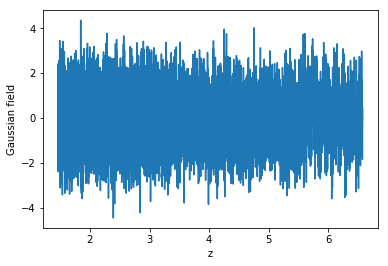

In [4]:
plt.plot(z,delta)
plt.xlabel('z')
plt.ylabel('Gaussian field')
plt.show()

In [5]:
density = mock.get_density(z_c,var_delta,z,delta)
print('mean density =', np.mean(density))
print('var density =', np.var(density))

mean density = 6.73845105791
var density = 147083.703213


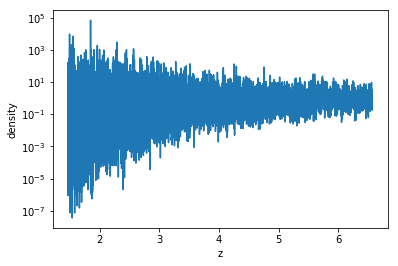

In [6]:
plt.semilogy(z,density)
plt.xlabel('z')
plt.ylabel('density')
plt.show()

In [7]:
tau = mock.get_tau(z,density)
print('mean tau =', np.mean(tau))
print('var tau =', np.var(tau))

mean tau = 2.43354113722
var tau = 673.579102367


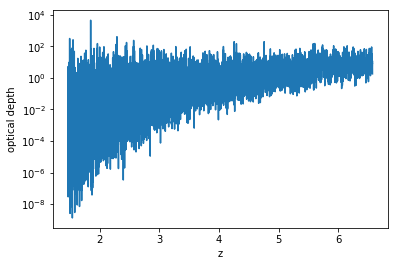

In [8]:
plt.semilogy(z,tau)
plt.xlabel('z')
plt.ylabel('optical depth')
plt.show()

In [9]:
flux = mock.get_flux(z_c,tau)
print('mean flux =', np.mean(flux))
print('var flux =', np.var(flux))

mean flux = 0.62976979957
var flux = 0.155528743565


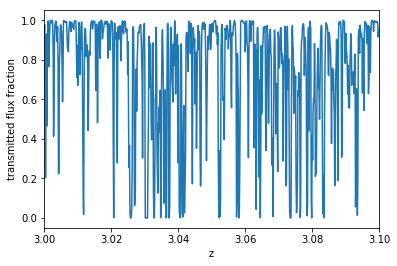

In [10]:
plt.plot(z,flux)
plt.xlabel('z')
plt.ylabel('transmitted flux fraction')
plt.xlim(3.0,3.1)
plt.show()

In [11]:
test_wave, test_flux = mock.get_lya_skewer(seed=123)

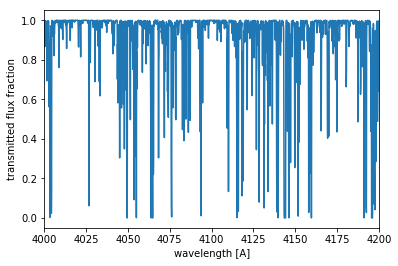

In [13]:
plt.plot(test_wave,test_flux)
plt.xlabel('wavelength [A]')
plt.ylabel('transmitted flux fraction')
plt.xlim(4000,4200)
plt.show()